In [1]:
import os
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

## 1. Load audio file with Librosa

### 1.1 Load

In [2]:
audio_file = 'audio/1.wav'
print(f'Is the audio file path legit: {os.path.isfile(audio_file)}')

Is the audio file path legit: True


In [3]:
# playback
ipd.Audio(audio_file)
# 18-21 你好 我问一下我那个快递啊

In [4]:
# load the audio file with librosa
signal, sr = librosa.load(audio_file)

### 1.2 Tailor the audio

In [5]:
def tailor_audio(signal, in_point, out_point, sample_rate):
    '''
    Arguments:
        signal: audio signal loaded with librosa
        in_point: in point in original signal.  in sec
        out_point: out point in original signal   in sec
        sample_rate: in Hz

    Return:
        signal tailored: ndarry-like (n_sample,)
    '''
    return signal[int(in_point*sample_rate):int(out_point*sample_rate)] 

In [6]:
tailored_audio = tailor_audio(signal, 18, 21, sr)

In [7]:
ipd.Audio(tailored_audio, rate =sr) # 18-21 你好 我问一下我那个快递啊

### 1.3 resample

In [8]:
tailored_audio = librosa.resample(tailored_audio, sr, 8000)
sr = 8000

## 2. Extracting Spectrogram

### 2.1 Extracting Short-Time Fourier Transform

In [9]:
FRAME_SIZE = 2048
HOP_SIZE = 512

In [10]:
stft_ta = librosa.stft(tailored_audio, n_fft=FRAME_SIZE, hop_length=HOP_SIZE) # the default windowing is hann

In [11]:
stft_ta.shape # (frame_size/2+1, frames), frames=(n_samples-frame_size/hop_length)+1

(1025, 47)

In [12]:
type(stft_ta[0][0])

numpy.complex64

In [13]:
stft_ta[0][0]

(0.21658933+0j)

### 2.2 Calculating the Spectrogram

In [14]:
Y_scale=np.abs(stft_ta)**2 # power

In [15]:
Y_scale.shape

(1025, 47)

In [16]:
type(Y_scale[0][0])

numpy.float32

### 2.3 Visualizing the spectrogram

In [17]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")

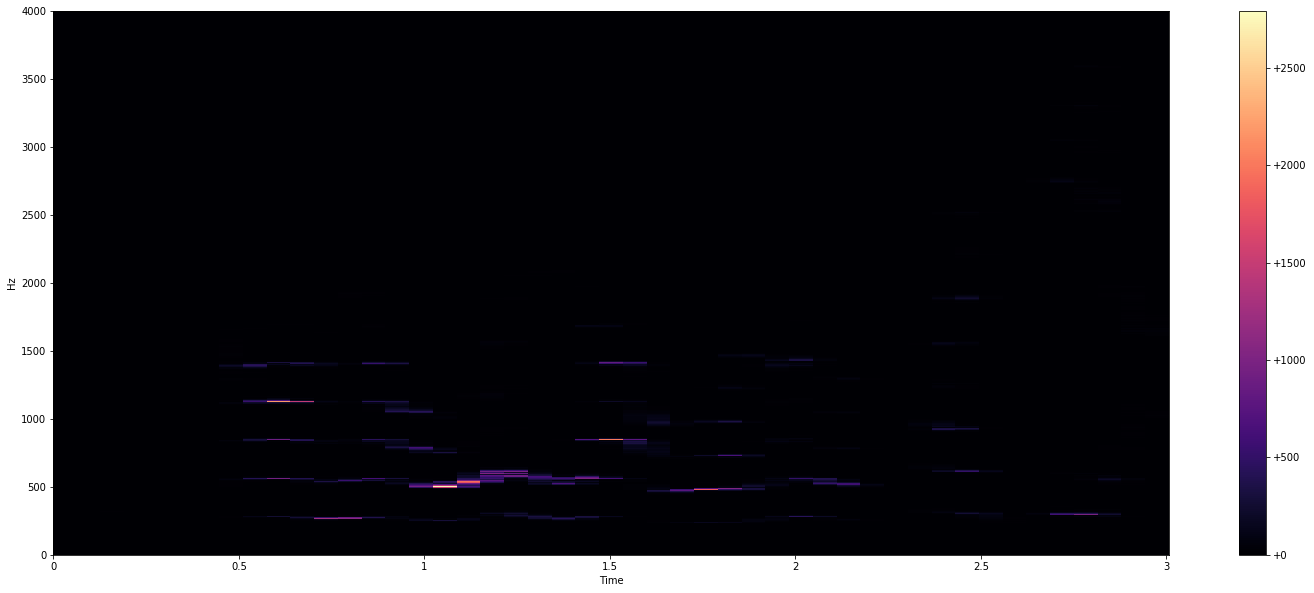

In [18]:
plot_spectrogram(Y_scale, sr, HOP_SIZE)

### 2.4 Log-Amplitude Spectrum

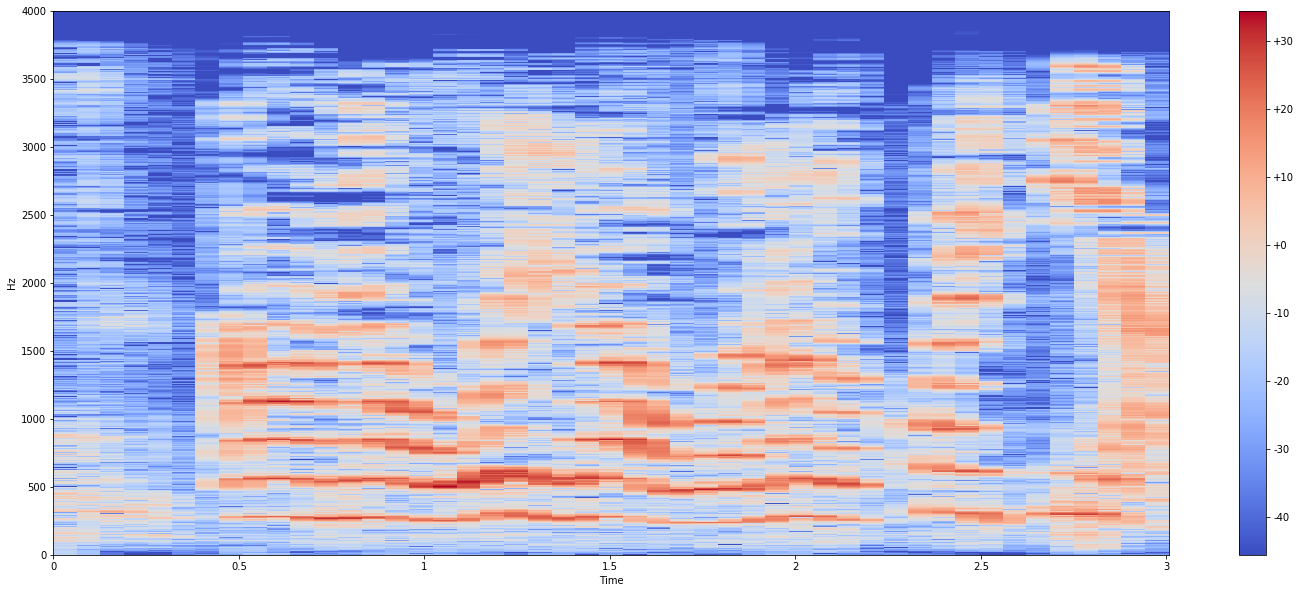

In [19]:
Y_log_scale = librosa.power_to_db(Y_scale)
plot_spectrogram(Y_log_scale, sr, HOP_SIZE)

## 3. Extracting Mel-Spectrogram

### 3.1 Mel filter banks

In [20]:
filter_banks = librosa.filters.mel(n_fft=2048, sr=sr, n_mels=128)

In [21]:
filter_banks.shape

(128, 1025)

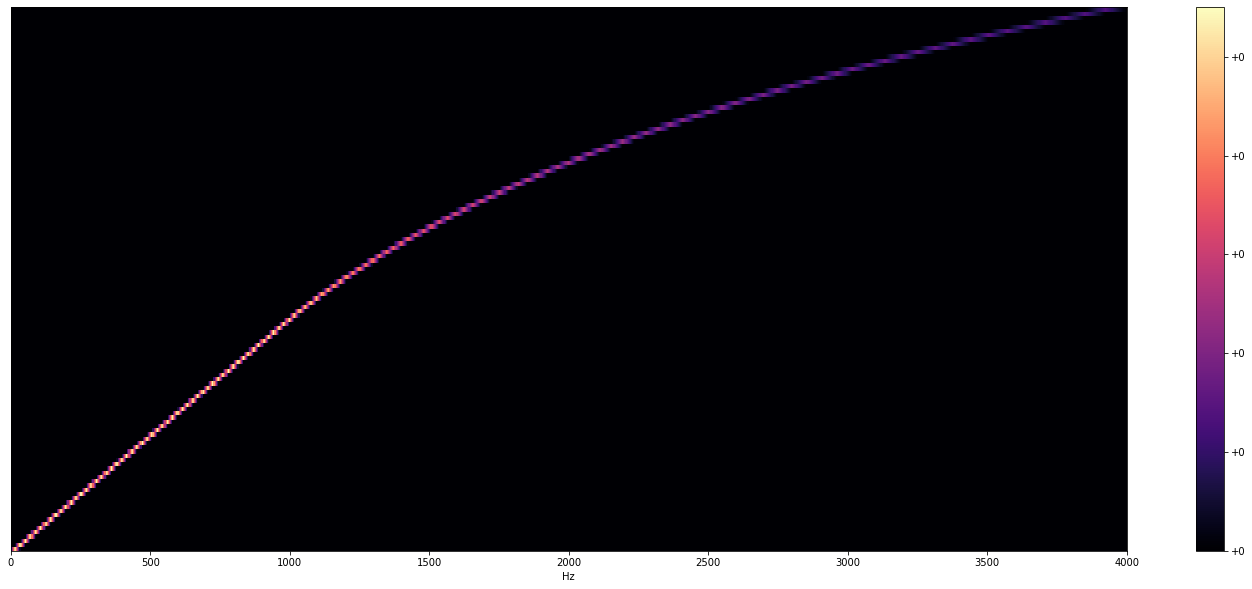

In [22]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(filter_banks, 
                         sr=sr, 
                         x_axis="linear")
plt.colorbar(format="%+2.f")
plt.show()

### 3.2 Mel filter banks demo

In [23]:
filter_banks_demo = librosa.filters.mel(n_fft=2048, sr=sr, n_mels=10)

In [24]:
filter_banks_demo.shape

(10, 1025)

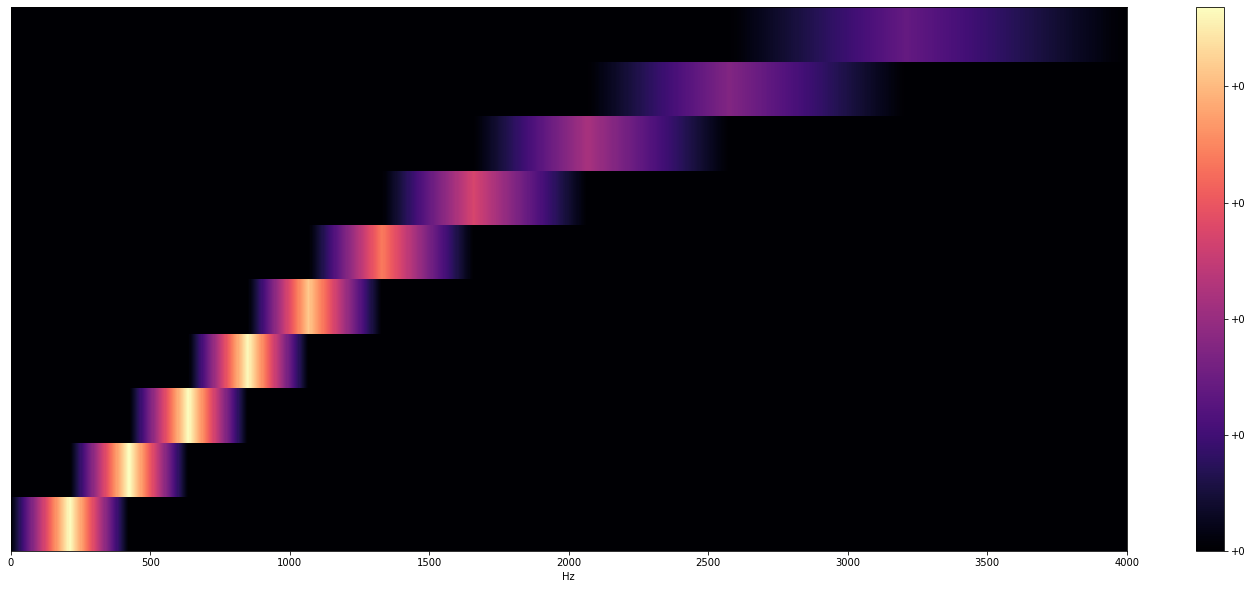

In [25]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(filter_banks_demo, 
                         sr=sr, 
                         x_axis="linear")
plt.colorbar(format="%+2.f")
plt.show()

### 3.3 Extracting Mel Spectrogram

In [36]:
mel_spectrogram = librosa.feature.melspectrogram(tailored_audio, sr=sr, n_fft=2048, hop_length=512, n_mels=128)

In [37]:
mel_spectrogram.shape # (n_mels, frames)

(128, 47)

In [38]:
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram) 

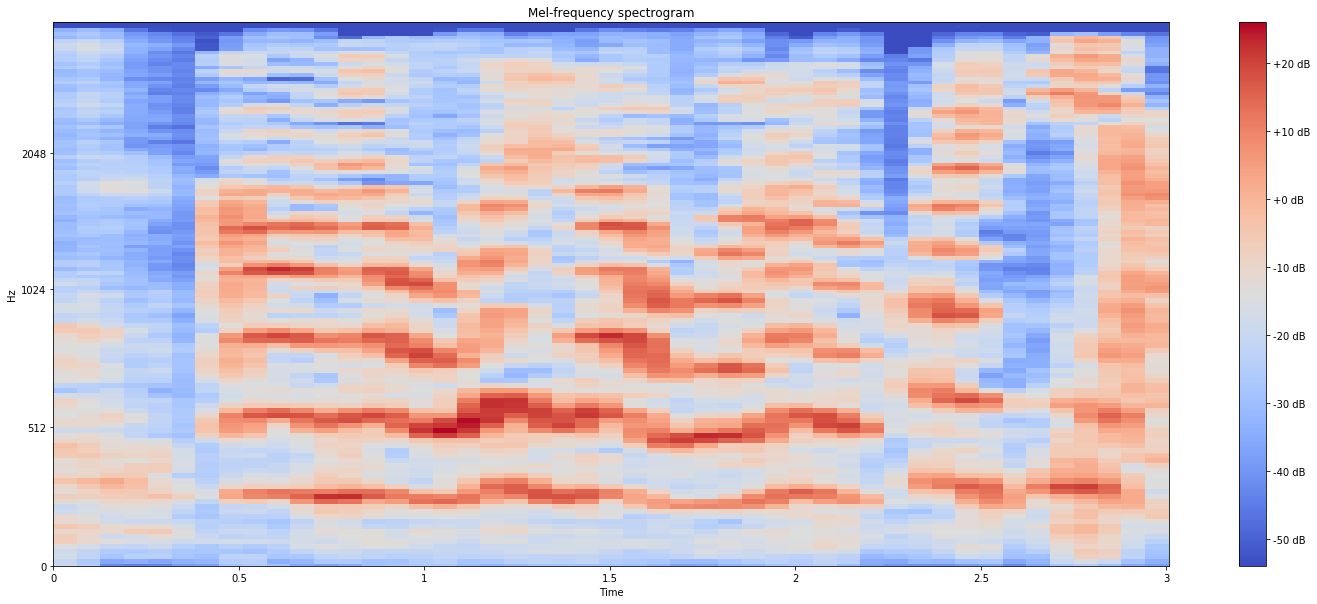

In [46]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(log_mel_spectrogram, # (n_mels, frames)
                         sr=sr,
                         x_axis="time",
                         y_axis="mel",
                         fmax= 4000
                         )
plt.colorbar(format="%+2.0f dB")
plt.title('Mel-frequency spectrogram')
plt.show()

## 4. Extracting Mel-Frequency Cepstral Coefficients

In [77]:
# Extract MFCCs
mfccs = librosa.feature.mfcc(tailored_audio, n_mfcc=13, sr=sr)

In [78]:
mfccs.shape

(13, 47)

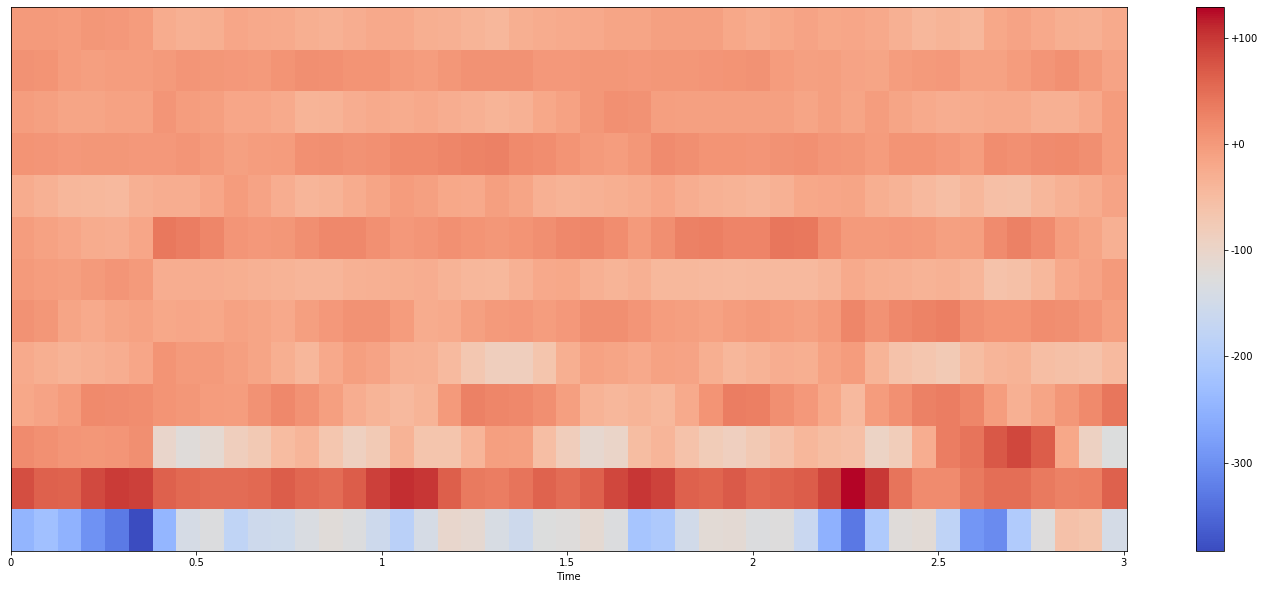

In [79]:
# Visualise MFCCs
plt.figure(figsize=(25,10))
librosa.display.specshow(mfccs,
                        x_axis="time",
                        sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

In [80]:
# Calculate delta and delta2 MFCCs
delta_mfccs = librosa.feature.delta(mfccs)
delta2_mfccs = librosa.feature.delta(mfccs, order=2)

In [81]:
delta_mfccs.shape

(13, 47)

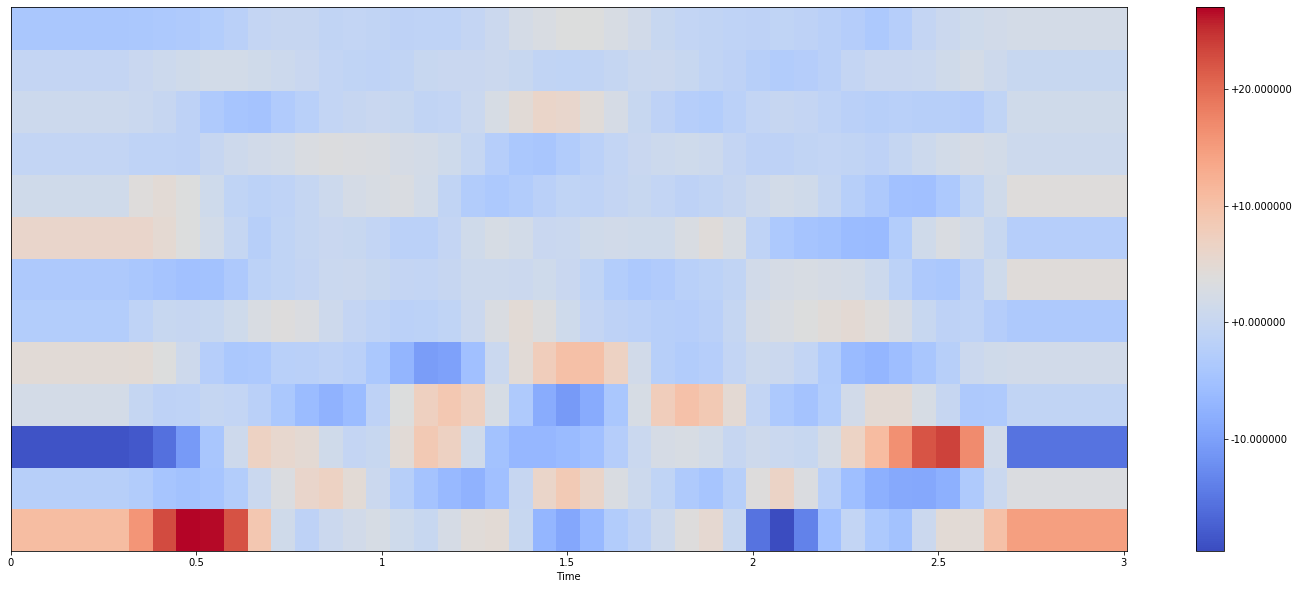

In [82]:
plt.figure(figsize=(25,10))
librosa.display.specshow(delta_mfccs,
                       x_axis='time',
                       sr=sr)
plt.colorbar(format='%+2f')
plt.show()

In [83]:
# concatnate
comprehensive_mfccs = np.concatenate((mfccs, delta_mfccs, delta2_mfccs))

In [84]:
comprehensive_mfccs.shape

(39, 47)

### Reverse mfccs to audio

In [85]:
rev_signal = librosa.feature.inverse.mfcc_to_audio(mfccs)

In [88]:
ipd.Audio(rev_signal, rate=8000)